In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from subprocess import check_output
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import string
import re 
import nltk
from matplotlib import cm
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer

In [2]:
df = pd.read_csv('Data/cleaned_df.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954
1,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,rhett and link. gmm. good mythical morning. rh...,343168,10172,666,2146
2,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,ijustine. week with iPhone X. iphone x. apple....,119180,9763,511,1434
3,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,5 Ice Cream Gadgets. Ice Cream. Cream Sandwich...,817732,23663,778,3432
4,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,Trailer. Hugh Jackman. Michelle Williams. Zac ...,826059,3543,119,340


# EDA

In [3]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,25167.000000,25167.000000,25167.000000,25167.000000,25167.000000
mean,21.216593,256719.601979,9270.305201,335.108912,1452.087575
std,6.614624,233465.904111,14424.762573,1218.177495,3417.209877
min,1.000000,549.000000,0.000000,0.000000,0.000000
25%,20.000000,77963.500000,1218.000000,54.000000,223.000000
50%,24.000000,178234.000000,3925.000000,144.000000,672.000000
75%,24.000000,368630.000000,11139.500000,347.000000,1615.000000
max,43.000000,999910.000000,241679.000000,110707.000000,247214.000000


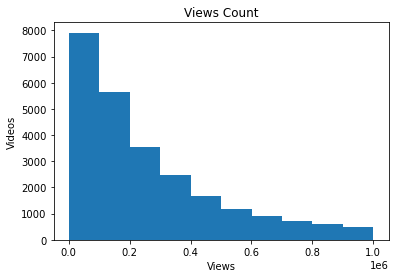

<Figure size 432x288 with 0 Axes>

In [4]:
# Histogram of the number of videos and view counts
plt.hist(df.views)
plt.title("Views Count")
plt.xlabel("Views")
plt.ylabel("Videos")

plt.savefig('figures/views_hist.png')

plt.show()

As expected, the number of videos decreased as the views increased.

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954
1,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,rhett and link. gmm. good mythical morning. rh...,343168,10172,666,2146
2,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,ijustine. week with iPhone X. iphone x. apple....,119180,9763,511,1434
3,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,5 Ice Cream Gadgets. Ice Cream. Cream Sandwich...,817732,23663,778,3432
4,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,Trailer. Hugh Jackman. Michelle Williams. Zac ...,826059,3543,119,340


In [6]:
# Normalizing the data using log distribution
df['likes_log'] = np.log(df['likes']+1)
df['views_log'] = np.log(df['views'] +1)
df['dislikes_log'] = np.log(df['dislikes'] +1)
df['comment_count_log'] = np.log(df['comment_count']+1)

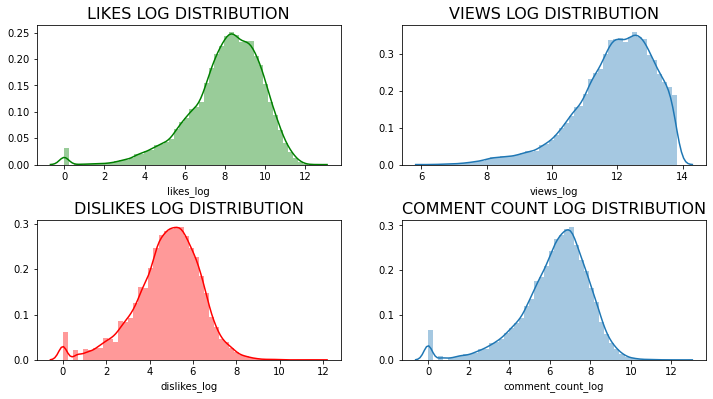

In [7]:
# PLotting the normalized data
plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(df['likes_log'], color = 'green')
g1.set_title("LIKES LOG DISTRIBUTION", fontsize = 16)

plt.subplot(222)
g2 = sns.distplot(df['views_log'])
g2.set_title("VIEWS LOG DISTRIBUTION", fontsize = 16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color = 'r')
g3.set_title("DISLIKES LOG DISTRIBUTION", fontsize=16)

plt.subplot(224)
g4 = sns.distplot(df['comment_count_log'])
g4.set_title("COMMENT COUNT LOG DISTRIBUTION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show()

In [8]:
# Viewing the different values of the 'category id'
np.unique(df["category_id"])

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43],
      dtype=int64)

In [9]:
# Assigning names to the categories using the json files provided with the data
df['category_name'] = np.nan

df.loc[(df["category_id"]== 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2), "category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10), "category_name"] = 'Music'
df.loc[(df["category_id"] == 15), "category_name"] = 'Pet and Animals'
df.loc[(df["category_id"] == 17), "category_name"] = 'Sports'
df.loc[(df["category_id"] == 19), "category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20), "category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22), "category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23), "category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24), "category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25), "category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26), "category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27), "category_name"] = 'Education'
df.loc[(df["category_id"] == 28), "category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29), "category_name"] = 'Non-profits and Activism'
df.loc[(df["category_id"] == 30), "category_name"] = 'Movies'
df.loc[(df["category_id"] == 43), "category_name"] = 'Shows'

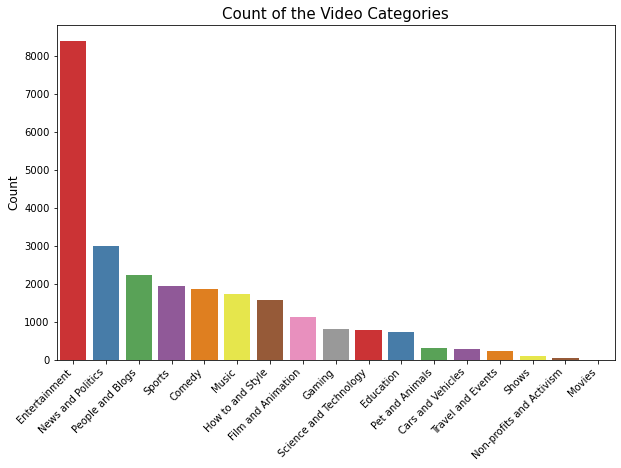

In [10]:
# PLotting the count of videos in each category
plt.figure(figsize = (10,6))
g = sns.countplot('category_name', data = df, palette="Set1", order = df['category_name'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Count of the Video Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)

plt.savefig('figures/counts_by_category_bg.png')

plt.show()

Most videos were in the entertainment category. News and Politics being a far second with a steady decline in the number of videos in the following categories.

In [11]:
# Defining likes, dislike and comment rate based on views
# by dividing the number of likes, dislikes, and comments by views
df['like_rate'] = df['likes']/df['views']
df['dislike_rate'] = df['dislikes']/df['views']
df['comment_rate'] = df['comment_count']/df['views']

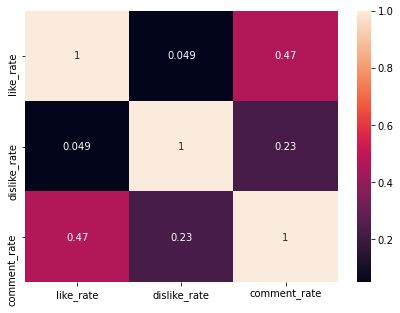

In [12]:
# Heatmap comparing the rates of likes and dislikes with comments
plt.figure(figsize = (7,5))
sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate']].corr(), annot=True)

plt.savefig('figures/comment_rate_heatmap.png')


plt.show()

There is a 47% chance a person will comment if they like the video and a 23% chance they will comment if they dislike it.

In [13]:
# Tokenizing the tags and putting them in a new list
tags = []
for x in df['tags']:
    token = sent_tokenize(x)
    tags.append(token)

newtags = []
for item in tags:
    for x in item:
        newtags.append(x.strip('.')) # Removing the period from the tokens
tags = newtags

In [14]:
# Setting a variable with the 35 most common tags in the dataset
fdist = FreqDist(tags)
common_words = fdist.most_common(35)

In [15]:
common_words

[('funny', 2014),
 ('comedy', 1409),
 ('news', 1012),
 ('politics', 727),
 ('video', 656),
 ('music', 575),
 ('News', 570),
 ('humor', 569),
 ('interview', 546),
 ('food', 505),
 ('talk show', 485),
 ('review', 484),
 ('comedian', 482),
 ('nba', 472),
 ('reaction', 472),
 ('Donald Trump', 457),
 ('donald trump', 448),
 ('sports', 441),
 ('show', 438),
 ('science', 434),
 ('entertainment', 431),
 ('basketball', 428),
 ('television', 422),
 ('how to', 419),
 ('celebrity', 418),
 ('Entertainment', 410),
 ('trump', 398),
 ('jokes', 367),
 ('react', 359),
 ('celebrities', 351),
 ('2018', 349),
 ('game', 346),
 ('Comedy', 345),
 ('Politics', 340),
 ('family friendly', 336)]

In [19]:
# Prepairing dictionary of tags and tag counts for WordCloud 
word_counts = [x[1] for x in common_words]
words = [x[0] for x in common_words]

words_dict = dict(zip(words, word_counts))

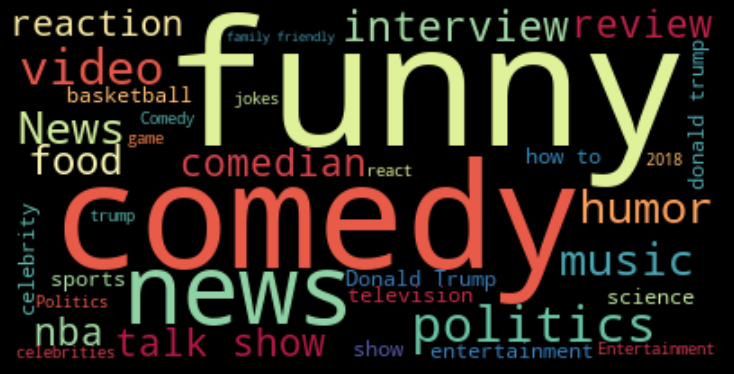

In [18]:
# Plotting WordCloud of 35 most frequent tags
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(words_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('figures/tags_wordcloud.png')

plt.show()